   step      type      amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0   206  CASH_OUT    62927.08   C473782114           0.00            0.00   
1   380   PAYMENT    32851.57  C1915112886           0.00            0.00   
2   570  CASH_OUT  1131750.38  C1396198422     1131750.38            0.00   
3   184  CASH_OUT    60519.74   C982551468       60519.74            0.00   
4   162   CASH_IN    46716.01  C1759889425     7668050.60      7714766.61   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isPayment  \
0  C2096898696       649420.67       712347.75        0          0   
1   M916879292            0.00            0.00        0          1   
2  C1612235515       313070.53      1444820.92        1          0   
3  C1378644910        54295.32       182654.50        1          0   
4  C2059152908      2125468.75      2078752.75        0          0   

   isMovement  accountDiff  
0           1    649420.67  
1           0         0.00  
2           1    818679.85  


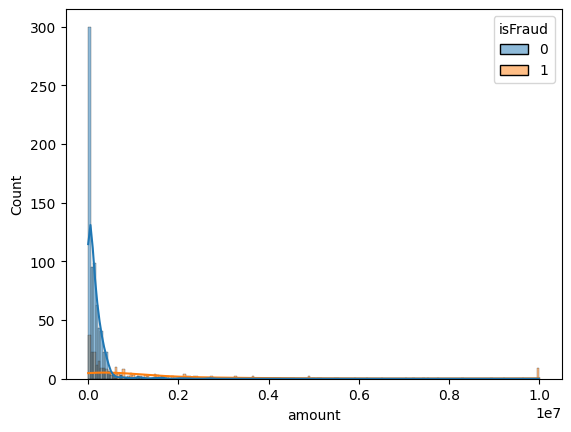

isPayment
0    780
1    220
Name: count, dtype: int64
isMovement
1    605
0    395
Name: count, dtype: int64
count    1.000000e+03
mean     1.744828e+06
std      3.792962e+06
min      0.000000e+00
25%      4.273675e+04
50%      3.383816e+05
75%      1.759913e+06
max      5.039905e+07
Name: accountDiff, dtype: float64
0.8414285714285714
0.8333333333333334
[-2.19321009]
[[ 2.42351926 -0.59875492  2.06690412 -0.9346309 ]]
[0 0 0 0]
[[0.625481   0.374519  ]
 [0.99799062 0.00200938]
 [0.99627387 0.00372613]
 [0.99846337 0.00153663]]


c:\Users\cuate\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [4]:
import seaborn as sn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the data
transactions = pd.read_csv('transactions_modified.csv')
print(transactions.head())
print(transactions.info())

# How many fraudulent transactions?
fraudulent = transactions.isFraud.value_counts()
print(fraudulent)
print(f'The amount of fraudulent transactions is {fraudulent[1]}')

# Summary statistics on amount column
print(transactions.amount.describe())
sn.histplot(data = transactions, x='amount', hue='isFraud', kde=True)
plt.show()
plt.close()

# Create isPayment field
transactions['isPayment'] = transactions['type'].apply(lambda x: 1 if (x == 'PAYMENT' or x == 'DEBIT') else 0)
transactions['isPayment'] = transactions['isPayment'].reset_index(drop=True)
print(transactions['isPayment'].value_counts())

# Create isMovement field
transactions['isMovement'] = transactions['type'].apply(lambda x:1 if(x=='CASH_OUT' or x == 'TRANSFER') else 0)
transactions['isMovement'] = transactions['isMovement'].reset_index(drop=True)
print(transactions['isMovement'].value_counts())

# Create accountDiff field
transactions['accountDiff'] = abs(transactions['oldbalanceOrg'] - transactions['oldbalanceDest'])
print(transactions.accountDiff.describe())

# Create features and label variables
features = transactions[['amount', 'isPayment', 'isMovement', 'accountDiff']]
label = transactions.isFraud

# Split dataset
x_train, x_test, y_train,y_test = train_test_split(features,label, train_size = 0.7, test_size =0.3)

# Normalize the features variables
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Fit the model to the training data
model = LogisticRegression()
model.fit(x_train,y_train)

# Score the model on the training data
print(model.score(x_train, y_train))

# Score the model on the test data
print(model.score(x_test, y_test))

# Print the model coefficients
print(model.intercept_)
print(model.coef_)

# New transaction data
transaction1 = np.array([123456.78, 0.0, 1.0, 54670.1])
transaction2 = np.array([98765.43, 1.0, 0.0, 8524.75])
transaction3 = np.array([543678.31, 1.0, 0.0, 510025.5])

# Create a new transaction
your_transaction = np.array([1231.21,1.0,0.0,474187.1])

# Combine new transactions into a single array
sample_transactions = np.stack([transaction1,transaction2,transaction3,your_transaction])

# Normalize the new transactions
sample_transactions = scaler.transform(sample_transactions)

# Predict fraud on the new transactions
print(model.predict(sample_transactions))

# Show probabilities on the new transactions
print(model.predict_proba(sample_transactions))